## MAT 653 
#### Wei Li

### Discrete space Metropolis' algorithm


Toy Example: Sampling from a Simple Distribution
Let's say we want to sample from a distribution $\pi$ over three states $A, B, C$ with probabilities $\pi_A=0.4, \pi_B=0.2$, and $\pi_C=0.4$. We will start with an arbitrary initial transition matrix $P$ :
$$
P=\left(\begin{array}{lll}
0.5 & 0.3 & 0.2 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.2 & 0.7
\end{array}\right)
$$

Here, $P_{i j}$ represents the probability of transitioning from state $i$ to state $j$.

The modified transition matrix $\tilde{P}$ is:
$$
\tilde{P}=\left(\begin{array}{lll}
0.8 & 0.1 & 0.1 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.1 & 0.8
\end{array}\right)
$$

This new transition matrix $\tilde{P}$ will have $\pi$ as its stationary distribution.

In [3]:
import numpy as np

# Given stationary distribution pi and initial transition matrix P
pi = np.array([0.4, 0.2, 0.4])  # for states A, B, C
P = np.array([
    [0.5, 0.3, 0.2],  # from state A
    [0.2, 0.6, 0.2],  # from state B
    [0.1, 0.2, 0.7]   # from state C
])

# Step 1: Compute acceptance probabilities alpha
alpha = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        if i != j:
            alpha[i, j] = min((pi[j] * P[j, i]) / (pi[i] * P[i, j]), 1)

# Step 2: Modify transition probabilities to get P_tilde
P_tilde = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        if i != j:
            P_tilde[i, j] = alpha[i, j] * P[i, j]
    P_tilde[i, i] = 1 - np.sum(P_tilde[i, :])

P_tilde

array([[0.8, 0.1, 0.1],
       [0.2, 0.6, 0.2],
       [0.1, 0.1, 0.8]])

In [6]:
import matplotlib.pyplot as plt

def simulate_markov_chain(P, initial_state, n_steps):
    """
    Simulate a Markov Chain with given transition matrix and initial state.
    
    Args:
        P : numpy.ndarray
            The transition matrix. P[i, j] is the probability of transitioning
            from state i to state j.
            
        initial_state : int
            The initial state of the Markov Chain. Should be an index corresponding
            to a row in the transition matrix P.
            
        n_steps : int
            The number of steps to simulate the Markov Chain for.
        
    Returns:
        empirical_probs : dict
            A dictionary where the keys are the states (represented as integers)
            and the values are the empirical probabilities of these states based
            on the simulation.
    """
    
    # Initialize the current state to the initial_state
    state = initial_state
    
    # Initialize a dictionary to keep track of the number of times each state is visited
    state_counts = {0: 0, 1: 0, 2: 0}
    
    # Count the initial state
    state_counts[state] = 1

    # Run the Markov Chain for n_steps
    for _ in range(n_steps):
        
        # Choose the next state based on the transition probabilities from the current state
        next_state = np.random.choice([0, 1, 2], p=P[state, :])
        
        # Update the state counts
        state_counts[next_state] += 1
        
        # Update the current state
        state = next_state

    # Calculate the total number of steps (including the initial state)
    total_counts = sum(state_counts.values())
    
    # Calculate the empirical probabilities
    empirical_probs = {k: v / total_counts for k, v in state_counts.items()}
    
    return empirical_probs




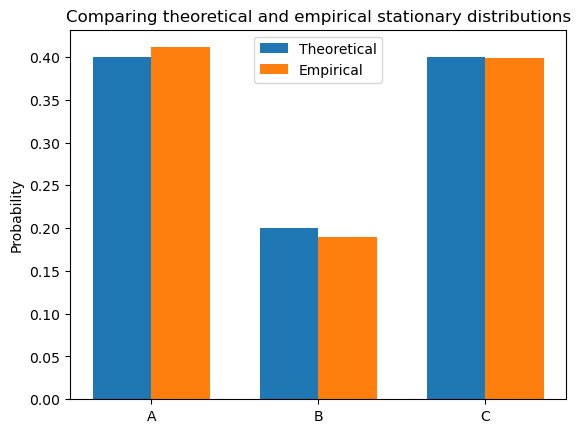

({'A': 0.41125887411258877,
  'B': 0.19018098190180982,
  'C': 0.39856014398560147},
 {'A': 0.4, 'B': 0.2, 'C': 0.4})

In [7]:

# Initial state (let's start with state A)
initial_state = 0

# Number of steps in the Markov Chain
n_steps = 10000

# Simulate the Markov Chain
empirical_probs = simulate_markov_chain(P_tilde, initial_state, n_steps)

# Compare to the theoretical stationary distribution
theoretical_probs = {'A': pi[0], 'B': pi[1], 'C': pi[2]}
empirical_probs = {'A': empirical_probs[0], 'B': empirical_probs[1], 'C': empirical_probs[2]}

# Plotting
labels = ['A', 'B', 'C']
theoretical_values = [theoretical_probs[label] for label in labels]
empirical_values = [empirical_probs[label] for label in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, theoretical_values, width, label='Theoretical')
rects2 = ax.bar(x + width/2, empirical_values, width, label='Empirical')

ax.set_ylabel('Probability')
ax.set_title('Comparing theoretical and empirical stationary distributions')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

empirical_probs, theoretical_probs